In [43]:
import pandas as pd
import numpy as np
import seaborn as sn

df = pd.read_csv("autos.csv")

The goal of this data analysis is to find what parameters affect the price of a car. By doing so, the results of this data analysis can be used to explore those same parameters hold up over time as a car graduates into a "classic" status.

In [44]:
df.head()

,datecrawled,name,seller,offertype,price,abtest,vehicletype,yearofregistration,gearbox,powerps,model,kilometer,monthofregistration,fueltype,brand,notrepaireddamage,datecreated,nrofpictures,postalcode,lastseen
0,2016-03-24T11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24T00:00:00,False,70435,2016-04-07T03:16:57
1,2016-03-24T10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24T00:00:00,False,66954,2016-04-07T01:46:50
2,2016-03-14T12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14T00:00:00,False,90480,2016-04-05T12:47:46
3,2016-03-17T16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17T00:00:00,False,91074,2016-03-17T17:40:17
4,2016-03-31T17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31T00:00:00,False,60437,2016-04-06T10:17:21


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   datecrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offertype            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicletype          333659 non-null  object
 7   yearofregistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerps              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthofregistration  371528 non-null  int64 
 13  fueltype             338142 non-null  object
 14  brand                371528 non-null  object
 15  notrepaireddamage    299468 non-nu

In [46]:
df.describe(include='all')

,datecrawled,name,seller,offertype,price,abtest,vehicletype,yearofregistration,gearbox,powerps,model,kilometer,monthofregistration,fueltype,brand,notrepaireddamage,datecreated,nrofpictures,postalcode,lastseen
count,371528,371528,371528,371528,3.715280e+05,371528,333659,371528.000000,351319,371528.000000,351044,371528.000000,371528.000000,338142,371528,299468,371528,371528,371528.00000,371528
unique,280500,233531,2,2,NaN,2,8,NaN,2,NaN,251,NaN,NaN,7,40,2,114,1,NaN,182806
top,2016-03-24T14:49:47,Ford_Fiesta,privat,Angebot,NaN,test,limousine,NaN,manuell,NaN,golf,NaN,NaN,benzin,volkswagen,nein,2016-04-03T00:00:00,False,NaN,2016-04-07T06:45:59
freq,7,657,371525,371516,NaN,192585,95894,NaN,274214,NaN,30070,NaN,NaN,223857,79640,263182,14450,371528,NaN,17
mean,NaN,NaN,NaN,NaN,1.729514e+04,NaN,NaN,2004.577997,NaN,115.549477,NaN,125618.688228,5.734445,NaN,NaN,NaN,NaN,NaN,50820.66764,NaN
std,NaN,NaN,NaN,NaN,3.587954e+06,NaN,NaN,92.866598,NaN,192.139578,NaN,40112.337051,3.712412,NaN,NaN,NaN,NaN,NaN,25799.08247,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,1000.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1067.00000,NaN
25%,NaN,NaN,NaN,NaN,1.150000e+03,NaN,NaN,1999.000000,NaN,70.000000,NaN,125000.000000,3.000000,NaN,NaN,NaN,NaN,NaN,30459.00000,NaN
50%,NaN,NaN,NaN,NaN,2.950000e+03,NaN,NaN,2003.000000,NaN,105.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,NaN,NaN,49610.00000,NaN
75%,NaN,NaN,NaN,NaN,7.200000e+03,NaN,NaN,2008.000000,NaN,150.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,NaN,NaN,71546.00000,NaN


In [47]:
#Dropping some irrelevant columns, converting km to mi

df = df.drop(["seller", "monthofregistration", "datecreated", "abtest", "lastseen"], axis=1)
df["miles"] = df["kilometer"].apply(lambda x: x * .621371)
df = df.drop("kilometer", axis=1)
print(df["fueltype"].unique())
print(df["offertype"].unique())
print(df["notrepaireddamage"].unique())
print(df["gearbox"].unique())
print(df["vehicletype"].unique())

['benzin' 'diesel' nan 'lpg' 'andere' 'hybrid' 'cng' 'elektro']
['Angebot' 'Gesuch']
[nan 'ja' 'nein']
['manuell' 'automatik' nan]
[nan 'coupe' 'suv' 'kleinwagen' 'limousine' 'cabrio' 'bus' 'kombi'
 'andere']


In [48]:
#Changing some columns from german to english

fuel_eng = {
    "benzin" : "gasoline",
    "andere" : "other",
    "elektro" : "electric",
    "lpg" : "liquid petroleum"
}

offer_eng = {
    "Angebot" : "offer",
    "Gesuch" : "wanted"
}
repaired_eng = {
    "ja" : "Yes",
    "nein" : "No"
}
gearbox_eng = {
    "manuell" : "Manual",
    "automatik" : "Automatic"
}
vehicletype_eng = {
    "kleinwagen" : "compact",
    "limousine" : "limo",
    "cabrio" : "convertible",
    "kombi" : "stationwagon"
}

df = df.replace({"fueltype" : fuel_eng})
df = df.replace({"offertype" : offer_eng})
df = df.replace({"notrepaireddamage" : repaired_eng})
df = df.replace({"gearbox" : gearbox_eng})
df = df.replace({"vehicletype" : vehicletype_eng})
df.head()


,datecrawled,name,offertype,price,vehicletype,yearofregistration,gearbox,powerps,model,fueltype,brand,notrepaireddamage,nrofpictures,postalcode,miles
0,2016-03-24T11:52:17,Golf_3_1.6,offer,480,NaN,1993,Manual,0,golf,gasoline,volkswagen,NaN,False,70435,93205.650
1,2016-03-24T10:58:45,A5_Sportback_2.7_Tdi,offer,18300,coupe,2011,Manual,190,NaN,diesel,audi,Yes,False,66954,77671.375
2,2016-03-14T12:52:21,"Jeep_Grand_Cherokee_""Overland""",offer,9800,suv,2004,Automatic,163,grand,diesel,jeep,NaN,False,90480,77671.375
3,2016-03-17T16:54:04,GOLF_4_1_4__3TÜRER,offer,1500,compact,2001,Manual,75,golf,gasoline,volkswagen,No,False,91074,93205.650
4,2016-03-31T17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,offer,3600,compact,2008,Manual,69,fabia,diesel,skoda,No,False,60437,55923.390


In [49]:
#Age of the car at the time the listing was crawled
df["datecrawled"] = pd.to_datetime(df["datecrawled"])
df["Age"] = df["datecrawled"].dt.year - df["yearofregistration"]
df["Age"].describe()

count    371528.000000
mean         11.422003
std          92.866598
min       -7983.000000
25%           8.000000
50%          13.000000
75%          17.000000
max        1016.000000
Name: Age, dtype: float64

<AxesSubplot: xlabel='Age'>

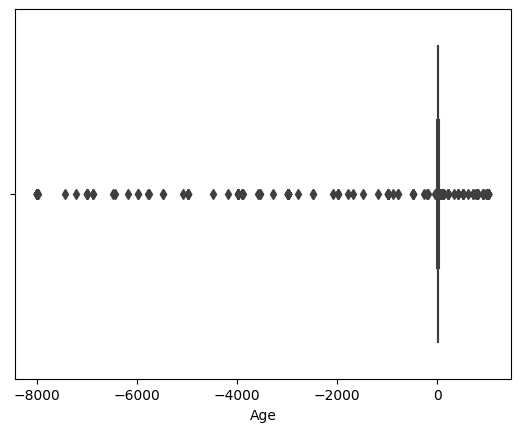

In [50]:
#strange outliers....
sn.boxplot(data=df, x="Age")


In [51]:
outlier_q1 = df["Age"].quantile(.25)
outlier_q3 = df["Age"].quantile(.75)
iqr = outlier_q3 - outlier_q1
outlier_range = [outlier_q1 - 1.5 * iqr, outlier_q3 + 1.5 * iqr]
df_filtered = df[(df["Age"] > outlier_range[0]) & (df["Age"] < outlier_range[1])]
df_filtered["Age"].describe()

count    364383.000000
mean         12.090235
std           6.475806
min          -3.000000
25%           8.000000
50%          12.000000
75%          17.000000
max          30.000000
Name: Age, dtype: float64

<AxesSubplot: xlabel='Age'>

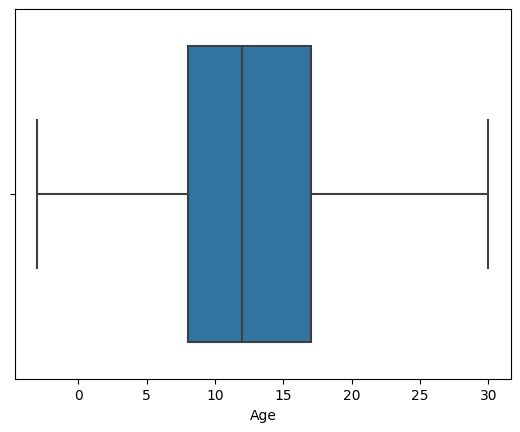

In [52]:
sn.boxplot(data=df_filtered, x="Age")

In [53]:
df_filtered.isna().sum()
#na values for the most part make up about 10% of the data, however, the notrepaireddamage will be handled using average vlaues

datecrawled               0
name                      0
offertype                 0
price                     0
vehicletype           36657
yearofregistration        0
gearbox               18707
powerps                   0
model                 18911
fueltype              31828
brand                     0
notrepaireddamage     69658
nrofpictures              0
postalcode                0
miles                     0
Age                       0
dtype: int64

In [54]:
df_filtered["notrepaireddamage"].value_counts()

No     259033
Yes     35692
Name: notrepaireddamage, dtype: int64

In [55]:
df_filtered["notrepaireddamage"] = df_filtered["notrepaireddamage"].fillna("No")
df_filtered = df_filtered.dropna().reset_index(drop=True)
df_filtered.isna().sum()

/var/folders/wm/j6zh4bsx5kd608f73_8dxtn40000gn/T/ipykernel_24499/3675796672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["notrepaireddamage"] = df_filtered["notrepaireddamage"].fillna("No")


datecrawled           0
name                  0
offertype             0
price                 0
vehicletype           0
yearofregistration    0
gearbox               0
powerps               0
model                 0
fueltype              0
brand                 0
notrepaireddamage     0
nrofpictures          0
postalcode            0
miles                 0
Age                   0
dtype: int64

In [56]:
df_filtered.loc[df_filtered["Age"] > 10, ">10 y/o"] = 1
df_filtered.loc[df_filtered["Age"] < 10, "<10 y/o"] = 1
df_filtered.loc[df_filtered["gearbox"] == "Automatic", "Automatic?"] = 1
df_filtered.loc[df_filtered["gearbox"] == "Manual", "Manual?"] = 1

In [57]:
df_filtered[">10 y/o"] = df_filtered[">10 y/o"].fillna(0)
df_filtered["<10 y/o"] = df_filtered["<10 y/o"].fillna(0)
df_filtered["Manual?"] = df_filtered["Manual?"].fillna(0)
df_filtered["Automatic?"] = df_filtered["Automatic?"].fillna(0)

In [58]:
df_filtered.corr()

/var/folders/wm/j6zh4bsx5kd608f73_8dxtn40000gn/T/ipykernel_24499/1659737963.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filtered.corr()


,price,yearofregistration,powerps,nrofpictures,postalcode,miles,Age,>10 y/o,<10 y/o,Automatic?,Manual?
price,1.000000,0.013084,0.006762,NaN,0.002359,-0.012349,-0.013084,-0.012473,0.013521,0.011406,-0.011406
yearofregistration,0.013084,1.000000,0.094405,NaN,0.059156,-0.490949,-1.000000,-0.798756,0.771483,0.138764,-0.138764
powerps,0.006762,0.094405,1.000000,NaN,0.024391,-0.020413,-0.094405,-0.089472,0.080026,0.162057,-0.162057
nrofpictures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
postalcode,0.002359,0.059156,0.024391,NaN,1.000000,-0.033386,-0.059156,-0.054734,0.055131,-0.024805,0.024805
miles,-0.012349,-0.490949,-0.020413,NaN,-0.033386,1.000000,0.490949,0.454095,-0.496606,-0.045514,0.045514
Age,-0.013084,-1.000000,-0.094405,NaN,-0.059156,0.490949,1.000000,0.798756,-0.771483,-0.138764,0.138764
>10 y/o,-0.012473,-0.798756,-0.089472,NaN,-0.054734,0.454095,0.798756,1.000000,-0.869791,-0.124735,0.124735
<10 y/o,0.013521,0.771483,0.080026,NaN,0.055131,-0.496606,-0.771483,-0.869791,1.000000,0.119262,-0.119262
Automatic?,0.011406,0.138764,0.162057,NaN,-0.024805,-0.045514,-0.138764,-0.124735,0.119262,1.000000,-1.000000


In [59]:
outlier_q1 = df["price"].quantile(.25)
outlier_q3 = df["price"].quantile(.75)
iqr = outlier_q3 - outlier_q1
outlier_range = [outlier_q1 - 1.5 * iqr, outlier_q3 + 1.5 * iqr]
df_filtered = df_filtered[(df_filtered["price"] > outlier_range[0]) & (df_filtered["price"] < outlier_range[1])].reset_index(drop=True)
df_filtered["price"].describe()

count    270603.000000
mean       4341.367295
std        3935.546402
min           0.000000
25%        1250.000000
50%        2990.000000
75%        6500.000000
max       16270.000000
Name: price, dtype: float64

<AxesSubplot: xlabel='price'>

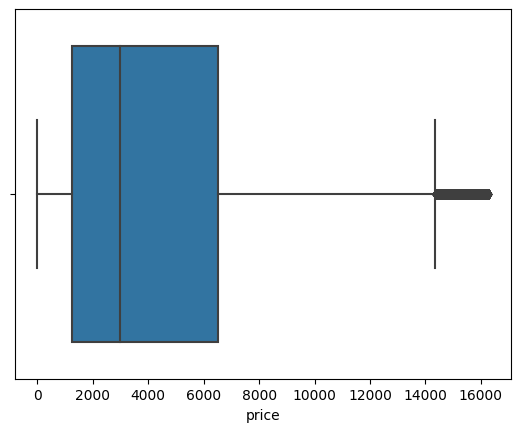

In [60]:
sn.boxplot(data=df_filtered, x="price")

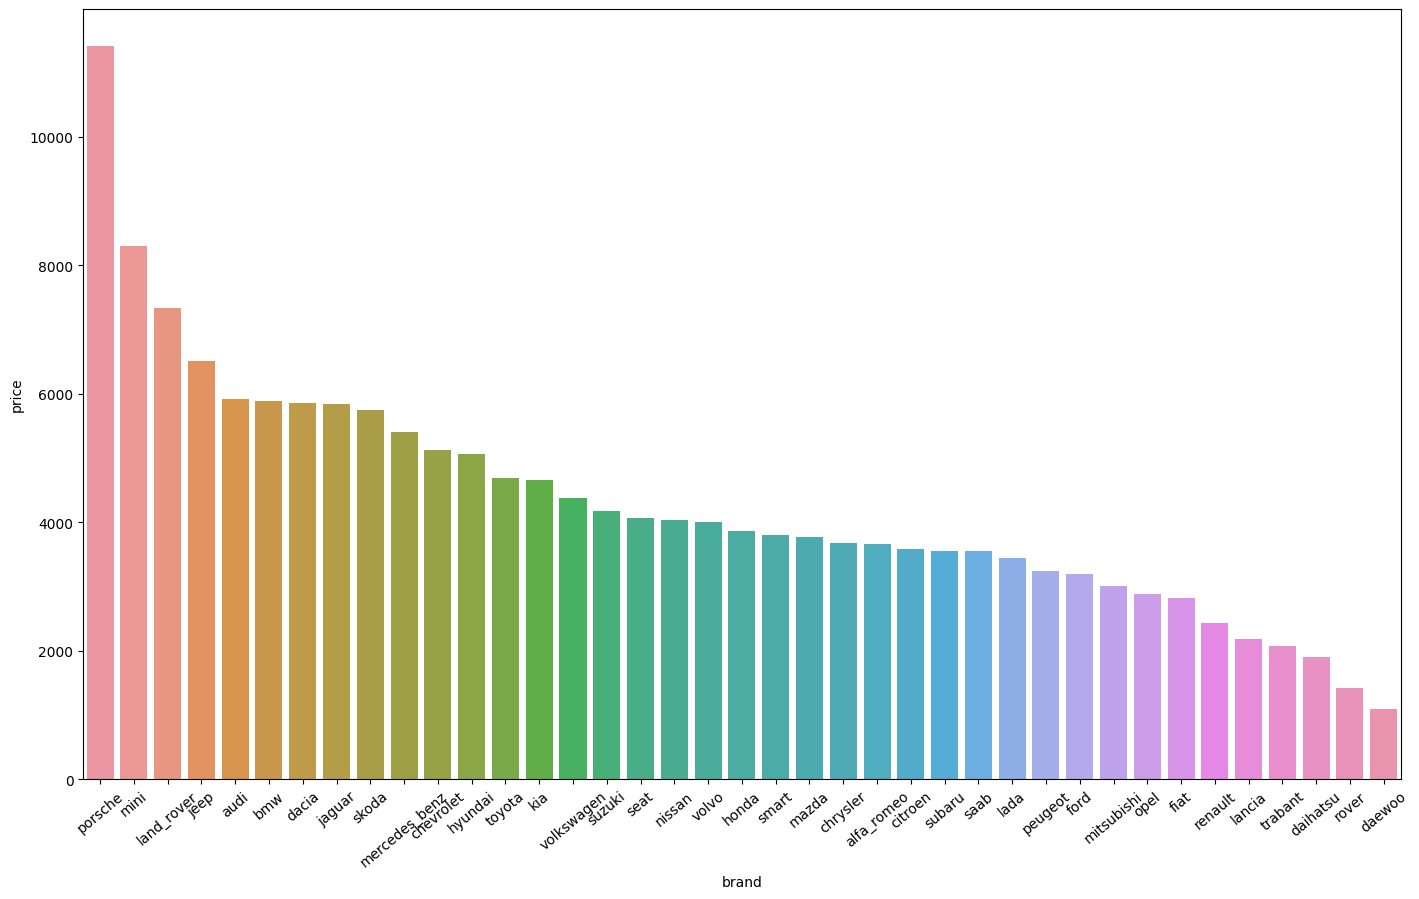

In [68]:

import matplotlib.pyplot as plt
plt.figure(figsize=(17,10))

mean_df = df_filtered.groupby("brand")["price"].mean().reset_index()
mean_df = mean_df.sort_values("price", ascending=False)
ax = sn.barplot(data=mean_df, x="brand", y="price")
plt.xticks(rotation=40)
plt.show()


In [ ]:
df_filtered.corr()

/var/folders/wm/j6zh4bsx5kd608f73_8dxtn40000gn/T/ipykernel_24499/1659737963.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filtered.corr()


,price,yearofregistration,powerps,nrofpictures,postalcode,miles,Age,>10 y/o,<10 y/o,Automatic?,Manual?
price,1.000000,0.659890,0.153281,NaN,0.063281,-0.350228,-0.659890,-0.648269,0.626830,0.222779,-0.222779
yearofregistration,0.659890,1.000000,0.050060,NaN,0.040247,-0.400966,-1.000000,-0.769882,0.729875,0.047789,-0.047789
powerps,0.153281,0.050060,1.000000,NaN,0.016414,0.028845,-0.050060,-0.043049,0.028774,0.123946,-0.123946
nrofpictures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
postalcode,0.063281,0.040247,0.016414,NaN,1.000000,-0.007125,-0.040247,-0.037545,0.035693,-0.039758,0.039758
miles,-0.350228,-0.400966,0.028845,NaN,-0.007125,1.000000,0.400966,0.394060,-0.433051,0.031285,-0.031285
Age,-0.659890,-1.000000,-0.050060,NaN,-0.040247,0.400966,1.000000,0.769882,-0.729875,-0.047789,0.047789
>10 y/o,-0.648269,-0.769882,-0.043049,NaN,-0.037545,0.394060,0.769882,1.000000,-0.850549,-0.034353,0.034353
<10 y/o,0.626830,0.729875,0.028774,NaN,0.035693,-0.433051,-0.729875,-0.850549,1.000000,0.016532,-0.016532
Automatic?,0.222779,0.047789,0.123946,NaN,-0.039758,0.031285,-0.047789,-0.034353,0.016532,1.000000,-1.000000


In [70]:
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split

price_X = df_filtered[["brand", "vehicletype", ]]
price_y = df_filtered[["price"]]

ols_formula = "price ~ +  C(brand) + C(vehicletype)"
X_train, X_test, Y_train, Y_test = train_test_split(price_X, price_y, test_size=.3)

ols_data = pd.concat([X_train, Y_train], axis=1)
OLS = ols(formula= ols_formula, data=ols_data)
model = OLS.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     856.9
Date:                Mon, 17 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:05:21   Log-Likelihood:            -1.8191e+06
No. Observations:              189422   AIC:                         3.638e+06
Df Residuals:                  189376   BIC:                         3.639e+06
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                       2899.9361    136.237     21.286      0.000    2632.914    3166.958
C(brand)[T.audi]                2197.0409    105.899     20.747      0.000    1989.481    2404.601
C(brand)[T.bmw]                 2001.8367    104.986     19.068      0.000    1796.066    2207.607
C(brand)[T.chevrolet]            880.2354    155.948      5.644      0.000     574.581    1185.890
C(brand)[T.chrysler]            -788.2184    164.716     -4.785      0.000   -1111.057    -465.380
C(brand)[T.citroen]             -169.7190    122.972     -1.380      0.168    -410.742      71.304
C(brand)[T.dacia]               1427.9521    185.025      7.718      0.000    1065.308    1790.596
C(brand)[T.daewoo]             -2043.9444    235.198     -8.690      0.000   -2504.927   -1582.962
C(brand)[T.daihatsu]           -1385.7378    202.732     -6.835      0.000   -1783.089    -988.387
C(brand)[T.fiat]                -438.8961    114.493     -3.833      0.000    -663.299    -214.493
C(brand)[T.ford]                -465.0239    106.765     -4.356      0.000    -674.280    -255.767
C(brand)[T.honda]                 39.3937    137.619      0.286      0.775    -230.337     309.124
C(brand)[T.hyundai]              612.8923    129.956      4.716      0.000     358.182     867.602
C(brand)[T.jaguar]              2484.4847    243.602     10.199      0.000    2007.030    2961.940
C(brand)[T.jeep]                -830.4679    221.952     -3.742      0.000   -1265.488    -395.447
C(brand)[T.kia]                  130.3947    140.821      0.926      0.354    -145.611     406.400
C(brand)[T.lada]               -2690.2972    369.569     -7.280      0.000   -3414.643   -1965.951
C(brand)[T.lancia]             -1289.1955    251.027     -5.136      0.000   -1781.203    -797.188
C(brand)[T.land_rover]           182.5644    246.857      0.740      0.460    -301.269     666.398
C(brand)[T.mazda]               -371.9727    120.684     -3.082      0.002    -608.510    -135.436
C(brand)[T.mercedes_benz]       1436.0405    105.548     13.606      0.000    1229.168    1642.912
C(brand)[T.mini]                4910.2756    133.229     36.856      0.000    4649.150    5171.401
C(brand)[T.mitsubishi]         -1228.8569    134.725     -9.121      0.000   -1492.914    -964.799
C(brand)[T.nissan]                 2.8251    123.665      0.023      0.982    -239.556     245.206
C(brand)[T.opel]                -697.9190    105.101     -6.640      0.000    -903.914    -491.924
C(brand)[T.peugeot]             -489.8228    112.137     -4.368      0.000    -709.608    -270.038
C(brand)[T.porsche]             5458.5754    239.373     22.804      0.000    4989.411    5927.740
C(brand)[T.renault]            -1078.0648    108.918     -9.898      0.000   -1291.542    -864.587
C(brand)[T.rov